# Bidirectional LSTM (Long Short Term Memory)
### Sentiment Analysis - Reviews

In [79]:
import kagglehub

from os import path
import chardet
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import linear_model

import string
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [4]:
path = kagglehub.dataset_download("d4rklucif3r/restaurant-reviews")
file_name = "Restaurant_Reviews.tsv"
file_path = path + "\\" + file_name
with open(file_path, 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'utf-8', 'confidence': 0.938125, 'language': ''}


In [11]:
df = pd.read_csv(file_path, sep='\t')
df.columns = ["Review", "Sentiment"]
df

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     1000 non-null   object
 1   Sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [16]:
df['Length'] = df['Review'].apply(len)
df.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [22]:
df[df['Length']==149]["Review"]

985    The problem I have is that they charge $11.99 ...
Name: Review, dtype: object

In [43]:
sns.set_style('darkgrid')

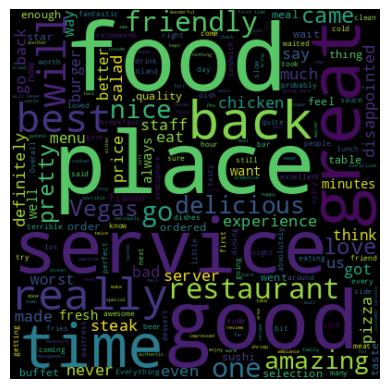

In [44]:
all_reviews = ' '.join(df['Review'])
wordCloud = WordCloud(
    width=400, 
    height=400, 
    random_state=42, 
    max_font_size=100
).generate(all_reviews)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

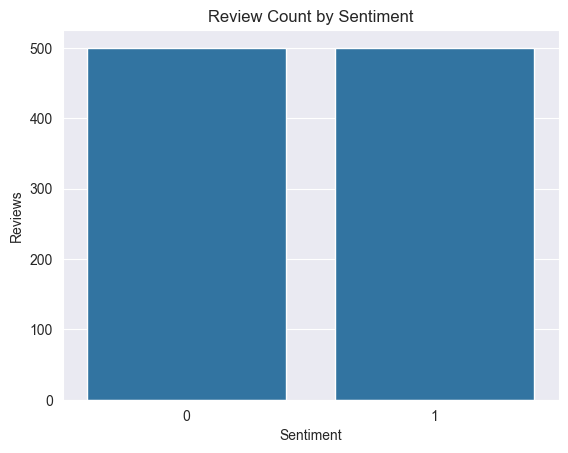

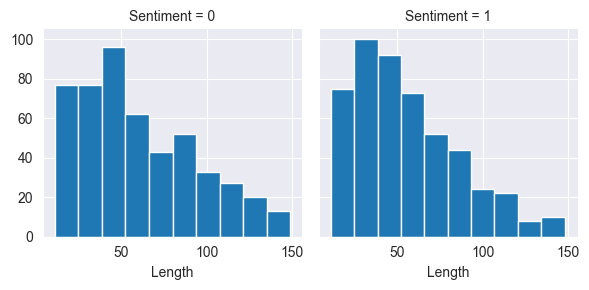

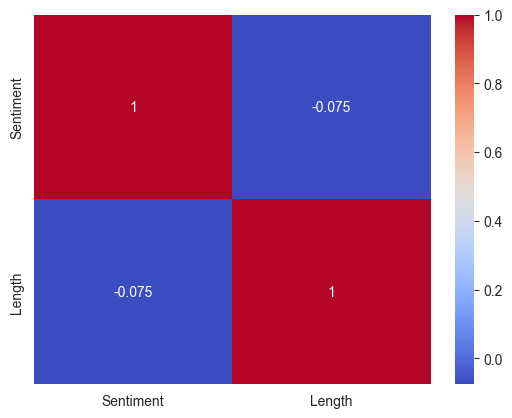

In [56]:
sns.countplot(x=df["Sentiment"])
plt.title('Review Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Reviews')
plt.show()

g = sns.FacetGrid(df, col='Sentiment')
g.map(plt.hist, 'Length')
plt.show()

corr_mat = df[["Sentiment", "Length"]].corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

In [60]:
y = df['Sentiment']

X = df['Review'].str.lower()
cv = CountVectorizer()
X = cv.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [64]:
y_pred = nb.predict(X_test)

In [70]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[81 15]
 [26 78]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        96
           1       0.84      0.75      0.79       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



In [74]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()), # train on TF-IDF vectors, Naive Bayes classifier
]) 

In [75]:
X = df['Review']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [77]:
y_pred = pipeline.predict(X_test)

In [78]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82 14]
 [28 76]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        96
           1       0.84      0.73      0.78       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200

